# Pymaceuticals Inc.
---

### Analysis

The different drug regimens have some pretty different average tumor volumes, and different variances, too. Two of the drugs, Capomulin and Ramicane, have the lowest average tumor volumes, both around 40. All other drug regimens have average tumor volumes between 50 and 55, so 40 is a significantly lower value. The standard deviations are also very different, with Capomulin and Ramicane having standard deviations both just under 5, and other regimens having standard deviations as high as 8.  These lower standard deviations paired with the lower means for tumor volume indicate to me that these drugs are not presenting better as a quirk or coincidence of the data, but rather that they genuinely have significantly lower tumor volumes, on average, when compared to other regimens. 
Interestingly these are also the two drugs with the highest number of rows, although this might not directly mean more mice were in that regimen: since a single mouse likely has multiple rows for different time periods, it's possible to have more rows for a single drug regimen even if they all have the same kind of mice. It does still seem like a good sign for a particular drug regimen to have more rows - implying the mice live long enough with these tumors to be recorded at more time points - but it's not clear if there are other reasons to remove mice from the study between time period observations, so it's possible this discrepancy in row count is being caused by something unrelated to the drug regimen.
Almost exactly half male and female mice, 51% and 49%, which is good because it prevents getting confounding information, for example if a drug worked better or worse on male or female mice, the data might suggest that drug was performing better or worse than it really was if there was a majority of only one sex of mouse. 
Based on the boxplots of final tumor volume for four different treatment regimens, we can see that Capomulin and Ramicane really do have much lower tumor volumes than Infubinol and Ceftamin. There is barely any overlap between the lowest final tumor volumes for Infubinol and Ceftamin, and the highest final tumor volumes for Capomulin and Ramicane (the one outlier for Infubinol notwithstanding). This indicates to me that these two drugs, Capomulin and Ramicane, are significantly better at controlling tumor growth in mice than the other drug regimens in the data. This is also evident in the lineplot for a single mouse on the Capomulin regimen - the tumor volume has a sharp decline starting around timepoint 20, and despite some spikes back up, ultimately is much lower than either the starting tumor volume or the highest tumor volume.
The scatterplot and regression model for mouse weight and tumor volume for Capomulin also indicate a strong positive correlation between mouse weight and tumor volume - higher weight mice are more likely to have larger (higher volume) tumors. This follows intuitively, as a larger tumor could be considered 'proportional' to a larger mouse, although of course the causality between these we can't know. Are the tumors larger because the mice are heavier, or are the mice heavier because the tumors are larger, or neither? This data can't tell us, only indicate that there is a positive correlation between tumor volume and mouse weight, for mice on the Capomulin regimen.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
# this creates a dataframe called mouse_dupes with one instance of the duplicate rows present in the original dataframe
mouse_dupes
# we can see the duplicate rows are all for mouse ID g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#filter the original dataframe by mouse ID for g989 since that's our duplicate culprit
mouse_dupe_df = mouse_df[mouse_df['Mouse ID'] == 'g989']
mouse_dupe_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = mouse_df[mouse_df['Mouse ID'] != 'g989']
mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# first, create new dataframe which just has drug regimen (to group by) and tumor volume columns
mice_grouped = mice_df[['Drug Regimen', 'Tumor Volume (mm3)']]
mice_grouped = mice_grouped.groupby('Drug Regimen')

# now create the summary by concatenating the desired summary stats of the groupby object
drug_summary = pd.concat([mice_grouped.mean(), mice_grouped.median(), mice_grouped.var(), mice_grouped.std(),
                         mice_grouped.sem()], axis=1)
# set the column names 
drug_summary.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 
                       'Tumor Volume Std. Error']
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# I used the earlier method to create the drug summary

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

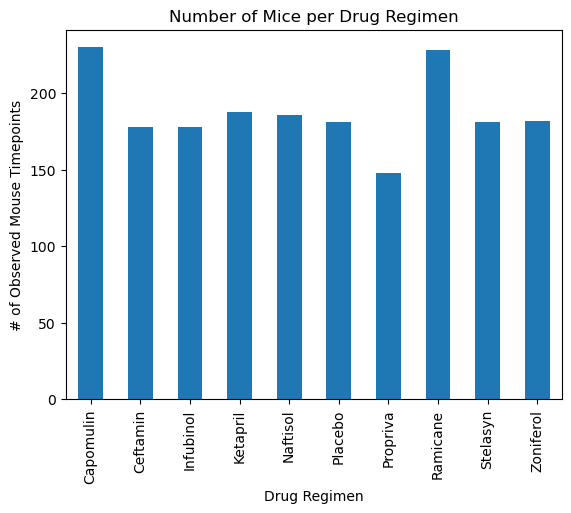

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar = mice_df.groupby('Drug Regimen').size()
mice_bar.plot(kind='bar', title='Number of Mice per Drug Regimen', 
                                            ylabel='# of Observed Mouse Timepoints', 
                                            xlabel='Drug Regimen')

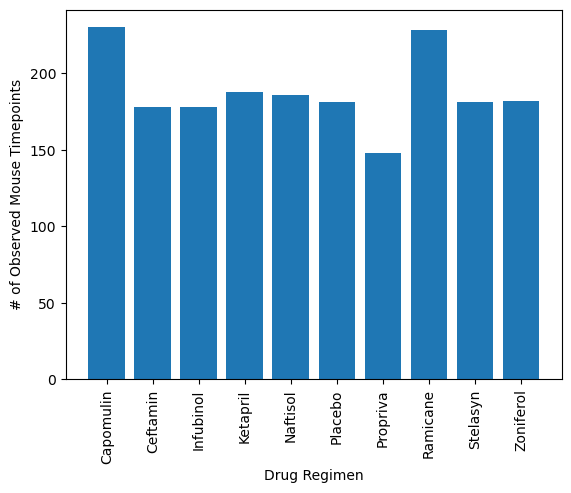

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_bar.index.values.tolist()
plt.bar(x_axis, mice_bar)
plt.xticks(range(len(x_axis)), rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

Text(0, 0.5, 'Sex')

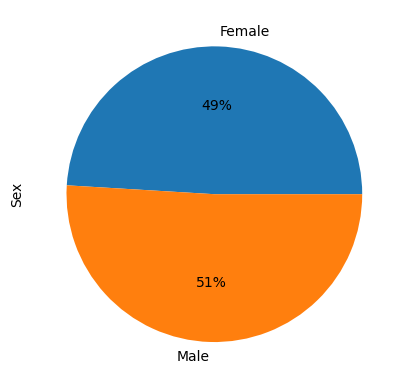

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# first group by sex to get the number of male and female mice
mice_pie = mice_df.groupby('Sex').size()

# then plot the pie chart using this grouped data
mice_pie.plot(kind='pie', autopct='%1.0f%%').set_ylabel('Sex')

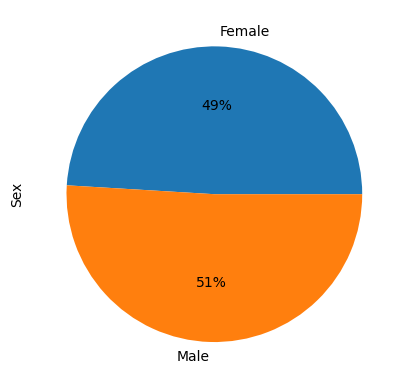

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = ['Female', 'Male']
plt.pie(mice_pie, labels=pie_labels, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# first I will create a dataframe which contains only those treatment regimens
mice_reduced = mice_df[ ((mice_df['Drug Regimen'] == 'Capomulin') | (mice_df['Drug Regimen'] == 'Ramicane')) | 
                       ((mice_df['Drug Regimen'] == 'Infubinol') | (mice_df['Drug Regimen'] == 'Ceftamin')) ]


# Start by getting the last (greatest) timepoint for each mouse
# sort the reduced dataset (with only four treatment regimens) by timepoint
mice_time = mice_reduced.sort_values(by='Timepoint')
# then use groupby to only take the last (which is now also the greatest) timepoint for each mouse ID
mice_last = mice_time.groupby('Mouse ID').last()
# now mice_last has all the mice which had these four drug regimens, only at the last timepoint for each mouse


# Merge this grouped df with the original DataFrame to get the tumor volume at the last timepoint
# I'll use an inner merge to only keep the rows that I've selected for in mice_last
mice_merged = pd.merge(mice_last, mice_df, how='inner', on=['Mouse ID', 'Timepoint'], suffixes=[' Final', ' original'])

# this dataset is really just for the boxplot for final tumor volume
# for simplicity we'll only include relevant columns, final tumor volumne and drug regimen (which got duplicated in the merge)
mice_merged = mice_merged[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3) Final', 'Drug Regimen Final']]
mice_merged = mice_merged.rename(columns = {'Tumor Volume (mm3) Final': 'Tumor Volume', 'Drug Regimen Final': 'Drug Regimen'})

# display the created dataframe just to make sure it looks right
mice_merged

,Mouse ID,Timepoint,Tumor Volume,Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
# based on sample output this just means the four treatments we selected for in the last cell
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (to use in the for loop)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds


# change tumor volume to be a number, not a string
mice_merged['Tumor Volume'] = mice_merged['Tumor Volume'].astype(float)

# loop through the list of treatments
for regimen in treatments:
    # pull the tumor volumes for this drug regimen out
    tumor_vol = mice_merged[mice_merged['Drug Regimen'] == regimen]['Tumor Volume']
    
    # find third and first quartile, calculate iqr
    q3 = tumor_vol.quantile(q=0.75)
    q1 = tumor_vol.quantile(q=0.25)
    IQR = q3 - q1
    
    #calculate upper and lower limits using iqr for outlier check
    upper_limit = q3 + (IQR*1.5)
    lower_limit = q1 - (IQR*1.5)
    
    # sample output shows the 'outliers for x treatment' line prints even if no outliers are found, so print that here
    print("Potential outliers for " + regimen + ": ")
    
    # loop through the mice in the merged dataframe
    for mouse in mice_merged.index:
        # now we iterate through the rows of the reduced dataframe
        # check if the current mouse index has a matching drug regimen
        if (mice_merged['Drug Regimen'][mouse] == regimen):
            # this is the case where the current mouse is in the relevant drug regimen, so check for outlier
            if (mice_merged['Tumor Volume'][mouse] > upper_limit):
                print("Mouse ID: " + mice_merged['Mouse ID'][mouse] + ", Tumor Volume: " + str(mice_merged['Tumor Volume'][mouse]))
                # this is the case where the current mouse is an outlier, print it out
                
            
            if (mice_merged['Tumor Volume'][mouse] < lower_limit):
                # this is also the case where the current mouse is an outlier, print it out
                print("Mouse ID: " + mice_merged['Mouse ID'][mouse] + ", Tumor Volume: " + str(mice_merged['Tumor Volume'][mouse]))



Potential outliers for Capomulin: 
Potential outliers for Ramicane: 
Potential outliers for Infubinol: 
Mouse ID: c326, Tumor Volume: 36.3213458
Potential outliers for Ceftamin: 


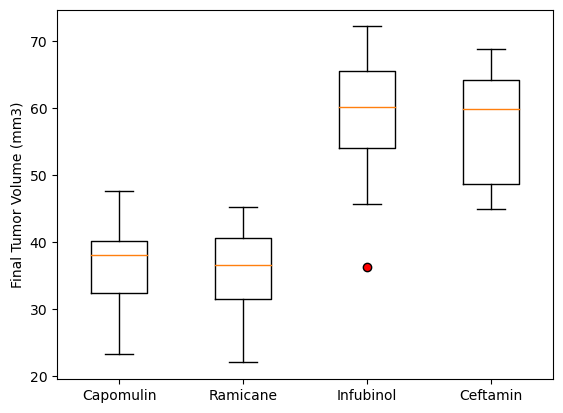

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# set up to have multiple plots on the same canvas
fix, ax = plt.subplots()

# set up data as four different lists of tumor volume values, this is how boxplot method wants the data passed in
mice_box = [mice_merged[mice_merged['Drug Regimen'] == 'Capomulin']['Tumor Volume'],
           mice_merged[mice_merged['Drug Regimen'] == 'Ramicane']['Tumor Volume'],
           mice_merged[mice_merged['Drug Regimen'] == 'Infubinol']['Tumor Volume'],
           mice_merged[mice_merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume']]

#create the plot
ax.boxplot(mice_box, flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# set the x axis to display the names of the drug underneath each boxplot
plt.xticks([1,2,3,4], treatments)
# set the y label
plt.ylabel('Final Tumor Volume (mm3)')

# display the plot
plt.show()


## Line and Scatter Plots

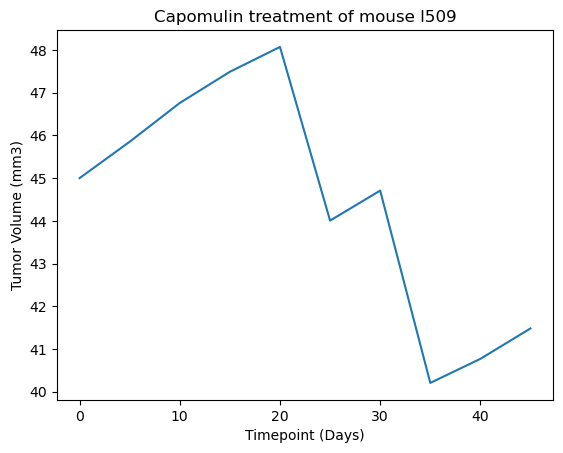

In [117]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# pull mouse l509 data from the dataframe
l509 = mice_df[mice_df['Mouse ID'] == 'l509']

# then plot using timepoint as x and tumor volume as y from that subset
plt.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'])

# set the title and axis labels
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# show the plot
plt.show()

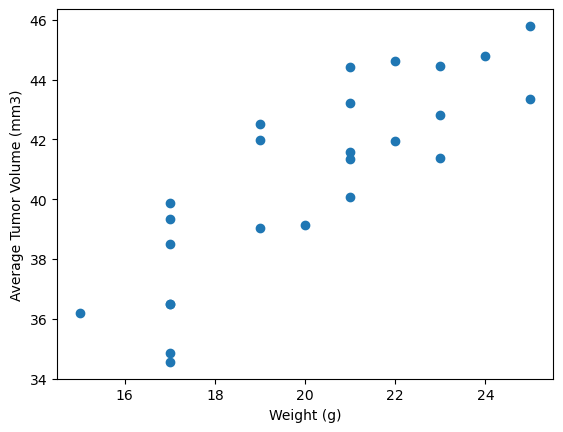

In [130]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# first get subset of all mice with capomulin regimen
capomulin = mice_df[mice_df['Drug Regimen'] == 'Capomulin']

# then get a dataframe with just one row for each mouse id
capomulin_single = capomulin.drop_duplicates('Mouse ID')
# and get a groupby object which has the average tumor weight for each mouse
capomulin_group = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# merge the grouped object back in, so that the average matches up to the right mouse id
# so that's an inner merge, only want to keep rows which are in both the reduced frame and have the average calculated
# (this results in one row for each mouse ID, and each row has the average tumor weight for the mouse)
capomulin_scatter = pd.merge(capomulin_single, capomulin_group, on='Mouse ID', how='inner', suffixes=['_x', ' Average'])

# plot using the weight of the mouse as x, average tumor volume as y
plt.scatter(x=capomulin_scatter['Weight (g)'], y=capomulin_scatter['Tumor Volume (mm3) Average'])

# set x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


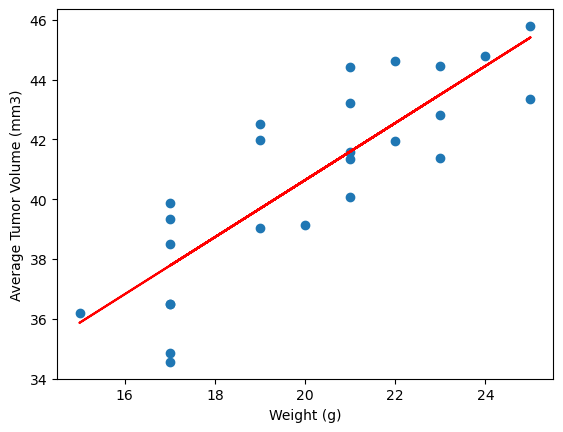

In [140]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# use linregress to find correlation coefficient and the intercept and coefficients for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x=capomulin_scatter['Weight (g)'], y=capomulin_scatter['Tumor Volume (mm3) Average'])

# print the correlation coefficient
print(f'The correlation between mouse weight and the average tumor volume is {rvalue:.2f}')

# plot the scatterplot, same as above
plt.scatter(x=capomulin_scatter['Weight (g)'], y=capomulin_scatter['Tumor Volume (mm3) Average'])

# add the regression line
plt.plot(capomulin_scatter['Weight (g)'], (capomulin_scatter['Weight (g)']*slope + intercept), color='red')

# set x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
